## MasterCard Stock Price Prediction Using LSTM & GRU

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed

set_seed(455)
np.random.seed(455)

### Data Analysis

In [7]:
dataset = pd.read_csv("data/Mastercard_stock_history.csv", index_col=["Date"],parse_dates=["Date"]).drop(["Dividends","Stock Splits"], axis=1)
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000
2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000
2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000
2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000
2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000


In [8]:
dataset.describe()

,Open,High,Low,Close,Volume
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3872 entries, 2006-05-25 to 2021-10-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3872 non-null   float64
 1   High    3872 non-null   float64
 2   Low     3872 non-null   float64
 3   Close   3872 non-null   float64
 4   Volume  3872 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 181.5 KB


In [10]:
dataset.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

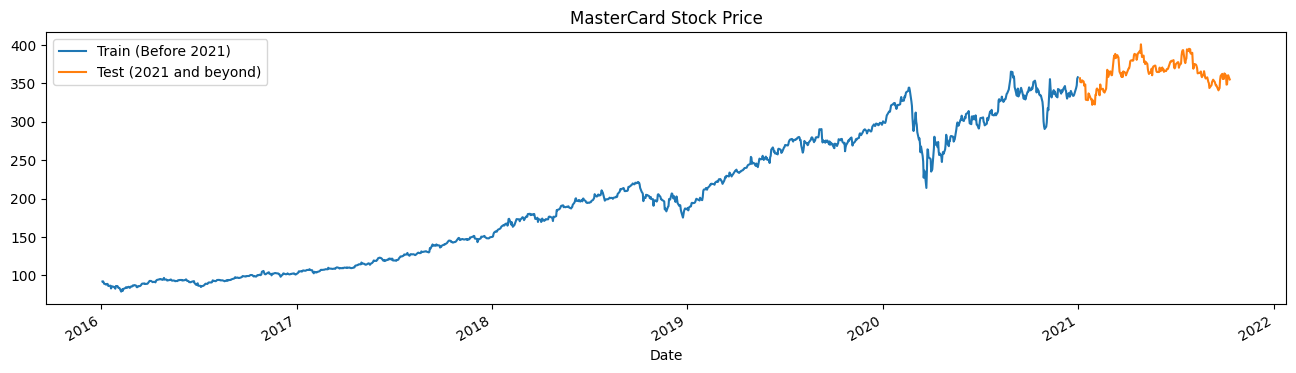

In [13]:
tstart = 2016
tend = 2020

def train_test_plot(dataset,tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}","High"].plot(figsize = (16,4),legend = True)
    dataset.loc[f"{tend+1}":,"High"].plot(figsize = (16,4),legend = True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("MasterCard Stock Price")
    plt.show()

train_test_plot(dataset, tstart, tend)

### Data Preprocessing

In [14]:
def train_test_split(dataset,tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}","High"].values
    test = dataset.loc[f"{tend+1}":,"High"].values
    return train, test 

training_set, test_set = train_test_split(dataset, tstart, tend)

In [15]:
training_set

array([ 92.14629264,  92.37765141,  91.1718942 , ..., 347.0476288 ,
       356.07333066, 357.6556067 ])

In [ ]:
test_set

Using MinMaxScaler to standardize the training set

In [19]:
sc = MinMaxScaler(feature_range=(0,1))
training_set = training_set.reshape(-1,1)
training_set_scaled = sc.fit_transform(training_set)

In [24]:
training_set_scaled.shape

(1259, 1)

In [26]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) -1 :
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
    

In [27]:
n_steps = 60
features = 1
X_train , y_train = split_sequence(training_set_scaled, n_steps)

In [29]:
y_train

array([[0.04456798],
       [0.04851835],
       [0.04848457],
       ...,
       [0.93713413],
       [0.9686838 ],
       [0.97421471]])

In [31]:
#Reshaping X_train for modeling
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], features)

## LSTM Model

The LSTM architecture

In [35]:
lstm_model = Sequential()
lstm_model.add(LSTM(units = 125, activation = "tanh", input_shape = (n_steps, features)))
lstm_model.add(Dense(units = 1))

#Complie the model
lstm_model.compile(optimizer="RMSprop", loss="mean_squared_error")
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 125)               63500     
                                                                 
 dense (Dense)               (None, 1)                 126       
                                                                 
Total params: 63626 (248.54 KB)
Trainable params: 63626 (248.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
lstm_model.fit(X_train,y_train, epochs=50, batch_size=32)

Epoch 1/50
38/38 [==============================] - 6s 73ms/step - loss: 0.0214
Epoch 2/50
38/38 [==============================] - 3s 66ms/step - loss: 0.0030
Epoch 3/50
38/38 [==============================] - 3s 66ms/step - loss: 0.0024
Epoch 4/50
38/38 [==============================] - 2s 65ms/step - loss: 0.0022
Epoch 5/50
38/38 [==============================] - 3s 68ms/step - loss: 0.0016
Epoch 6/50
38/38 [==============================] - 2s 65ms/step - loss: 0.0017
Epoch 7/50
38/38 [==============================] - 2s 65ms/step - loss: 0.0010
Epoch 8/50
38/38 [==============================] - 3s 70ms/step - loss: 0.0013
Epoch 9/50
38/38 [==============================] - 3s 68ms/step - loss: 0.0010
Epoch 10/50
38/38 [==============================] - 3s 67ms/step - loss: 0.0011
Epoch 11/50
38/38 [==============================] - 3s 78ms/step - loss: 8.4249e-04
Epoch 12/50
38/38 [==============================] - 3s 74ms/step - loss: 8.3691e-04
Epoch 13/50
38/38 [==========

In this case, the loss value is 3.8415e-04, which is a very small value and indicates that the model is performing well on the training data.

#### Repeating preprocessing and normalization on testset

In [38]:
dataset_total = dataset.loc[:,"High"]
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1,1)

#Scaling
inputs = sc.transform(inputs)


In [39]:
#Spliting into samples
X_test, y_test = split_sequence(inputs, n_steps)

#reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)

In [40]:
#prediction
predicted_stock_price = lstm_model.predict(X_test)


7/7 [==============================] - 1s 28ms/step


In [41]:
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [42]:
def plot_predictions(test,predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("MasterCard Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("MasterCard Stock Price")
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = np.sqrt(mean_squared_error(test , predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))

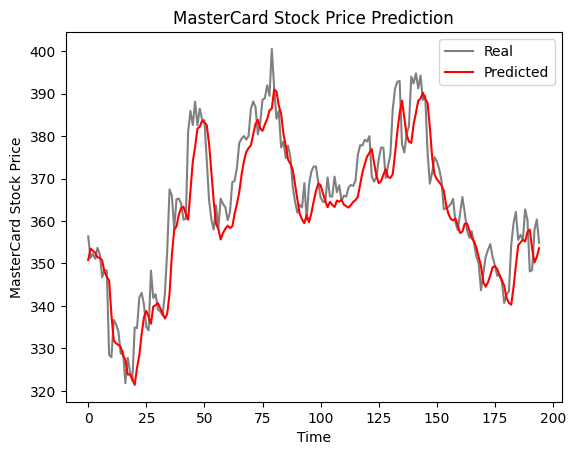

In [43]:
plot_predictions(test_set,predicted_stock_price)

#### Root Mean Squared Error on LSTM Model

In [44]:
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 6.93.


## Grated Recurrent Unit Model(GRU)

In [46]:
gru_model = Sequential()
gru_model.add(GRU(units = 125, activation = "tanh", input_shape = (n_steps,features)))
gru_model.add(Dense(units = 1))

#Compliling the RNN
gru_model.compile(optimizer = "RMSprop", loss = "mean_squared_error")

gru_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 125)               48000     
                                                                 
 dense_1 (Dense)             (None, 1)                 126       
                                                                 
Total params: 48126 (187.99 KB)
Trainable params: 48126 (187.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
gru_model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
38/38 [==============================] - 5s 69ms/step - loss: 0.0183
Epoch 2/50
38/38 [==============================] - 3s 83ms/step - loss: 0.0016
Epoch 3/50
38/38 [==============================] - 3s 70ms/step - loss: 0.0015
Epoch 4/50
38/38 [==============================] - 3s 72ms/step - loss: 0.0013
Epoch 5/50
38/38 [==============================] - 3s 83ms/step - loss: 9.9046e-04
Epoch 6/50
38/38 [==============================] - 3s 75ms/step - loss: 0.0012
Epoch 7/50
38/38 [==============================] - 3s 83ms/step - loss: 7.1055e-04
Epoch 8/50
38/38 [==============================] - 3s 84ms/step - loss: 9.2429e-04
Epoch 9/50
38/38 [==============================] - 3s 75ms/step - loss: 7.6144e-04
Epoch 10/50
38/38 [==============================] - 3s 74ms/step - loss: 8.5152e-04
Epoch 11/50
38/38 [==============================] - 3s 81ms/step - loss: 7.0703e-04
Epoch 12/50
38/38 [==============================] - 3s 76ms/step - loss: 6.6370e-04
Epoch 13/

7/7 [==============================] - 1s 23ms/step


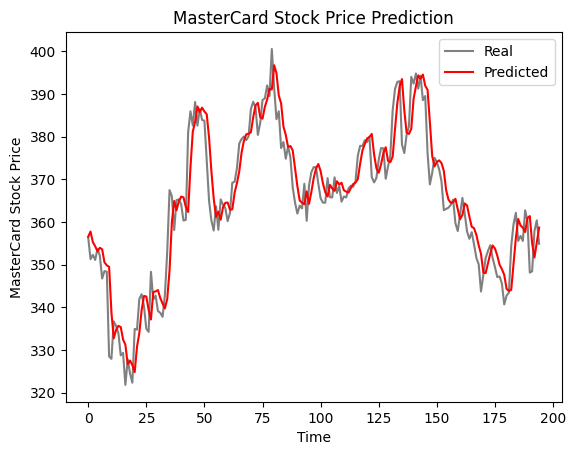

In [48]:
Gru_predicted_stock_price = gru_model.predict(X_test)
Gru_predicted_stock_price = sc.inverse_transform(Gru_predicted_stock_price)
plot_predictions(test_set, Gru_predicted_stock_price)

#### Root Mean Squared Error on GRU Model

In [49]:
return_rmse(test_set, Gru_predicted_stock_price)

The root mean squared error is 5.96.


#### Results clearly shows that the GRU model performed better than LSTM, with a similar structure and hyperparameters.